# Memory Profiling Notebook

# Introduction

This notebook aims to demonstrate the memory profiling process for the memory consumption experiment.
The goals of this notebooks are:

- Test and compare memory measurement tools (`psutil`, `resource`, `tracemalloc`, `/proc` filesystem).
- Validate consistency between internal and external profiling data.

## How to Use this Notebook

- Run the individual cells to inspect and verify the behavior of specific parts of the component.
- Review the expected behavior before running the full experiment via the shell script.
- Use this notebook as a debugging and documentation tool to support future iterations of the experiment.

By structuring the experiment this way, we ensure a clear separation between explanation, validation, and execution, making it easier to reason about the results while keeping the experiment reproducible and well-documented.

## Components Overview

Before running the component, we need to setup a few variables and utils.

In [1]:
import os
import sys
from datetime import datetime

from loguru import logger

dirs_to_add = [
    os.path.abspath('../'),
    os.path.abspath('../../../../libs/traceq'),
]

for dir_to_add in dirs_to_add:
    if dir_to_add not in sys.path:
        sys.path.insert(0, dir_to_add)

TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

EXPERIMENT_IMAGE = "mac/03-memory-profiling"
RELATIVE_OUT_DIR = f"out/03-memory-profiling-{TIMESTAMP}"
CONTAINER_OUT_DIR = f"/app/{RELATIVE_OUT_DIR}"

INLINES = "700"
XLINES = "700"
SAMPLES = "400"

logger.debug("Generated global variables")
logger.debug(f"TIMESTAMP: {TIMESTAMP}")
logger.debug(f"EXPERIMENT_IMAGE: {EXPERIMENT_IMAGE}")
logger.debug(f"RELATIVE_OUT_DIR: {RELATIVE_OUT_DIR}")
logger.debug(f"CONTAINER_OUT_DIR: {CONTAINER_OUT_DIR}")

logger.debug(f"INLINES: {INLINES}")
logger.debug(f"XLINES: {XLINES}")
logger.debug(f"SAMPLES: {SAMPLES}")

os.makedirs(f"../{RELATIVE_OUT_DIR}/docker-monitor", exist_ok=True)

2025-03-05 00:13:21.202 | DEBUG    | __main__:<module>:26 - Generated global variables
2025-03-05 00:13:21.202 | DEBUG    | __main__:<module>:27 - TIMESTAMP: 20250305001321
2025-03-05 00:13:21.202 | DEBUG    | __main__:<module>:28 - EXPERIMENT_IMAGE: mac/03-memory-profiling
2025-03-05 00:13:21.202 | DEBUG    | __main__:<module>:29 - RELATIVE_OUT_DIR: out/03-memory-profiling-20250305001321
2025-03-05 00:13:21.203 | DEBUG    | __main__:<module>:30 - CONTAINER_OUT_DIR: /app/out/03-memory-profiling-20250305001321
2025-03-05 00:13:21.203 | DEBUG    | __main__:<module>:32 - INLINES: 700
2025-03-05 00:13:21.203 | DEBUG    | __main__:<module>:33 - XLINES: 700
2025-03-05 00:13:21.203 | DEBUG    | __main__:<module>:34 - SAMPLES: 400


In [2]:
import importlib
import tools.docker

importlib.reload(tools.docker)

vfs_client, vfs_container = tools.docker.get_vfs_client(f"../{RELATIVE_OUT_DIR}")

2025-03-05 00:13:21.521 | INFO     | tools.docker:get_vfs_client:68 - Start dind dockerd...
ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:63971->[::1]:2375: read: connection reset by peer
2025-03-05 00:13:21.768 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:63976->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:23.856 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:63985->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:25.931 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:63992->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:28.004 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:63999->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:30.094 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64006->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:32.181 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64014->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:13:34.283 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64020->[::1]:2375: read: connection reset by peer
2025-03-05 00:13:36.378 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

[DEPRECATION NOTICE]: API is accessible on http://0.0.0.0:2375 without encryption.
         Access to the remote API is equivalent to root access on the host. Refer
         to the 'Docker daemon attack surface' section in the documentation for
         more information: https://docs.docker.com/go/attack-surface/
In future versions this will be a hard failure preventing the daemon from starting! Learn more at: https://docs.docker.com/go/api-security/
2025-03-05 00:13:38.500 | INFO     | tools.docker:__wait_for_dockerd:138 - Dockerd inside dind is fully operational.


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

Let's start by building the Docker image within the VFS client

In [3]:
from loguru import logger

logger.info("Building experiment image...")
experiment_image = tools.docker.build_image(EXPERIMENT_IMAGE, vfs_client)
logger.info("Experiment image built successfully.")

2025-03-05 00:13:38.577 | INFO     | __main__:<module>:3 - Building experiment image...
2025-03-05 00:13:38.577 | INFO     | tools.docker:build_image:21 - Building TraceQ image...
2025-03-05 00:14:54.548 | INFO     | tools.docker:build_image:27 - TraceQ image built.
2025-03-05 00:14:54.549 | INFO     | tools.docker:build_image:29 - Building experiment image...
2025-03-05 00:16:11.501 | INFO     | tools.docker:build_image:37 - Experiment image built.
2025-03-05 00:16:11.502 | INFO     | __main__:<module>:5 - Experiment image built successfully.


With the image built, we're going to generate the test data.

In [4]:
importlib.reload(tools.docker)

memory_usage_log_file = f"docker-monitor/memory-usage--data-generation.log"
page_faults_log_file = f"docker-monitor/page-faults--data-generation.log"

logger.info("Generating test data...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "generate-data",
        "--inlines", INLINES,
        "--xlines", XLINES,
        "--samples", SAMPLES,
        "--output-dir", f"{CONTAINER_OUT_DIR}/data"
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py generate-data",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        },
    },
)
logger.info("Finished generating test data")

2025-03-05 00:16:11.526 | INFO     | __main__:<module>:6 - Generating test data...
2025-03-05 00:16:12.344 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:16:12.345 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:17:25.391 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:17:25.392 | INFO     | __main__:<module>:29 - Finished generating test data


We'll start by running the memory profiling for the envelope operator.

In [5]:
importlib.reload(tools.docker)

memory_usage_log_file = f"docker-monitor/memory-usage--experiment.log"
page_faults_log_file = f"docker-monitor/page-faults--experiment.log"

tools.docker.drop_caches_in_container()

logger.info("Launching experiment...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-psutil",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        },
    },
)
logger.info("Finished executing experiment")

2025-03-05 00:17:25.789 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:17:25.792 | INFO     | __main__:<module>:8 - Launching experiment...
2025-03-05 00:17:26.154 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:17:26.155 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:17:34.095 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:17:34.096 | INFO     | __main__:<module>:32 - Finished executing experiment


In [6]:
import importlib
import tools.monitor

importlib.reload(tools.monitor)

docker_monitor_mu_df = tools.monitor.memory_usage_log_to_df(
    f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-usage--experiment.log",
)

docker_monitor_mu_df.head()

2025-03-05 00:17:34.109 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/03-memory-profiling-20250305001321/docker-monitor/memory-usage--experiment.log


,timestamp,memory_usage_kb
0,2025-03-05 03:17:29.376,26928
1,2025-03-05 03:17:29.387,28920
2,2025-03-05 03:17:29.402,33988
3,2025-03-05 03:17:29.414,35292
4,2025-03-05 03:17:29.426,35428


In [7]:
import tools.conversions

importlib.reload(tools.conversions)

docker_monitor_peak_memory_usage = tools.conversions.kb_to_gb(
    docker_monitor_mu_df["memory_usage_kb"].max()
)

logger.info(f"Docker monitor captured {len(docker_monitor_mu_df)} traces")
logger.info("Peak memory usage from Docker monitor: {} GB".format(docker_monitor_peak_memory_usage))

2025-03-05 00:17:34.139 | INFO     | __main__:<module>:9 - Docker monitor captured 369 traces
2025-03-05 00:17:34.140 | INFO     | __main__:<module>:10 - Peak memory usage from Docker monitor: 5.404792785644531 GB


In [8]:
from traceq import load_profile
import tools.conversions

importlib.reload(tools.conversions)

psutil_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-psutil.prof")
psutil_peak_memory_usage = tools.conversions.b_to_gb(
    max(entry["psutil_memory_usage"] for entry in psutil_profile["data"]))

logger.info(f"Tracer captured {len(psutil_profile["data"])} traces")
logger.info(f"Peak memory usage from psutil profile: {psutil_peak_memory_usage} GB")

2025-03-05 00:17:34.297 | INFO     | __main__:<module>:10 - Tracer captured 244 traces
2025-03-05 00:17:34.298 | INFO     | __main__:<module>:11 - Peak memory usage from psutil profile: 5.194698333740234 GB


Now that we've saw that the profiling structure is working using TraceQ, let's do some experiments with different profilers.
For each profile we will run against the same data, multiple times, in an isolated environment.

In [9]:
mu_conversion_handlers_by_unit = {
    "b": tools.conversions.b_to_gb,
    "kb": tools.conversions.kb_to_gb,
}


def experiment(iterations: int, traceq_profiler: str):
    docker_monitor_mu_history = []
    docker_monitor_pf_history = []
    traceq_history = []

    peak_docker_monitor_mu_history = []
    peak_docker_monitor_minor_pf_history = []
    peak_docker_monitor_major_pf_history = []
    peak_traceq_mu_history = []

    for i in range(iterations):
        logger.info(f"Iteration {i + 1}/{iterations}")

        tools.docker.drop_caches_in_container()

        docker_monitor_mu_log_file = f"docker-monitor/memory-usage--experiment-{traceq_profiler}-{i}.log"
        docker_monitor_pf_log_file = f"docker-monitor/page-faults-log-{traceq_profiler}-{i}.log"
        traceq_profile_output_dir = f"{CONTAINER_OUT_DIR}/profiler"
        traceq_profile_session_id = f"{INLINES}-{XLINES}-{SAMPLES}-{traceq_profiler}-{i}"

        tools.docker.run_isolated_container(
            client=vfs_client,
            image_name=EXPERIMENT_IMAGE,
            command=[
                "operate",
                "envelope",
                "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
                "--memory-profiler", traceq_profiler,
                "--memory-profile-output-dir", traceq_profile_output_dir,
                "--memory-profile-session-id", traceq_profile_session_id,
            ],
            environment={
                "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{docker_monitor_mu_log_file}",
                "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{docker_monitor_pf_log_file}",
                "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
            },
            volumes={
                "/mnt/out": {
                    "bind": CONTAINER_OUT_DIR,
                    "mode": "rw",
                },
            },
        )

        docker_monitor_mu_df = tools.monitor.memory_usage_log_to_df(
            f"../{RELATIVE_OUT_DIR}/{docker_monitor_mu_log_file}",
        )
        docker_monitor_pf_df = tools.monitor.page_faults_log_to_df(
            f"../{RELATIVE_OUT_DIR}/{docker_monitor_pf_log_file}",
        )

        docker_monitor_peak_mu = tools.conversions.kb_to_gb(
            docker_monitor_mu_df["memory_usage_kb"].max()
        )
        peak_docker_monitor_minor_pf = docker_monitor_pf_df["minor_page_faults"].max()
        peak_docker_monitor_major_pf = docker_monitor_pf_df["major_page_faults"].max()

        docker_monitor_mu_history.append(docker_monitor_mu_df)
        docker_monitor_pf_history.append(docker_monitor_pf_df)
        peak_docker_monitor_mu_history.append(docker_monitor_peak_mu)
        peak_docker_monitor_minor_pf_history.append(peak_docker_monitor_minor_pf)
        peak_docker_monitor_major_pf_history.append(peak_docker_monitor_major_pf)

        logger.info(f"Peak memory usage from Docker monitor: {docker_monitor_peak_mu} GB")
        logger.info(f"Peak minor page faults from Docker monitor: {peak_docker_monitor_minor_pf}")
        logger.info(f"Peak major page faults from Docker monitor: {peak_docker_monitor_major_pf}")

        traceq_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{traceq_profile_session_id}.prof")
        traceq_profile_data = traceq_profile["data"]
        traceq_profile_metadata = traceq_profile["metadata"]
        convert = mu_conversion_handlers_by_unit[traceq_profile_metadata[f"{traceq_profiler}_memory_usage_unit"]]

        peak_traceq_mu = convert(
            max(entry[f"{traceq_profiler}_memory_usage"] for entry in traceq_profile_data)
        )

        traceq_history.append(traceq_profile)
        peak_traceq_mu_history.append(peak_traceq_mu)

        logger.info(f"Peak memory usage from TraceQ: {peak_traceq_mu} GB")

    return {
        "docker_monitor_mu_history": docker_monitor_mu_history,
        "docker_monitor_pf_history": docker_monitor_pf_history,
        "traceq_history": traceq_history,
        "peak_docker_monitor_mu_history": peak_docker_monitor_mu_history,
        "peak_docker_monitor_minor_pf_history": peak_docker_monitor_minor_pf_history,
        "peak_docker_monitor_major_pf_history": peak_docker_monitor_major_pf_history,
        "peak_traceq_mu_history": peak_traceq_mu_history,
    }


In [10]:
iterations = 10

psutil_experiment_history = experiment(iterations, "psutil")

2025-03-05 00:17:34.343 | INFO     | __main__:experiment:18 - Iteration 1/10
2025-03-05 00:17:34.702 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:17:35.047 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:17:35.048 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:17:43.773 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:17:43.775 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/03-memory-profiling-20250305001321/docker-monitor/memory-usage--experiment-psutil-0.log
2025-03-05 00:17:43.779 | INFO     | tools.monitor:page_faults_log_to_df:32 - Reading page faults log file: ../out/03-memory-profiling-20250305001321/docker-monitor/page-faults-log-psutil-0.log
2025-03-05 00:17:43.781 | INFO     | __mai

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_variability(peaks: list[float], metric: str, unit: str = ""):
    unit = unit.strip() if unit else ""
    metric_with_unit = f"{metric}{f' ({unit})' if unit != '' else ''}"

    mean_peak = np.mean(peaks)
    std_dev_peak = np.std(peaks)
    median_peak = np.median(peaks)
    min_peak = np.min(peaks)
    max_peak = np.max(peaks)
    coefficient_of_variation = (std_dev_peak / mean_peak) * 100

    # Create a figure to visualize peak memory usage and its variability
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot peak memory usage
    ax.plot(peaks, marker='s', linestyle='-', color='r', alpha=0.7, label=f"Peak {metric_with_unit}")

    # Plot mean and standard deviation bands
    ax.axhline(mean_peak, color='b', linestyle='--', label=f'Mean: {mean_peak:.2f} {unit}')
    ax.fill_between(range(len(peaks)), mean_peak - std_dev_peak, mean_peak + std_dev_peak,
                    color='blue', alpha=0.2, label=f'Standard Deviation: ±{std_dev_peak:.2f} {unit}')

    # Annotate min and max values
    ax.scatter(np.argmin(peaks), min_peak, color='green', label=f'Min: {min_peak:.2f} {unit}', zorder=3)
    ax.scatter(np.argmax(peaks), max_peak, color='purple', label=f'Max: {max_peak:.2f} {unit}', zorder=3)

    # Labels and title
    ax.set_xlabel("Run Number")
    ax.set_ylabel(metric_with_unit)
    ax.set_title(f"Peak {metric} Across Runs with Variability")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.plot([], [], ' ', label=f'Coefficient of Variation (CV): {coefficient_of_variation:.2f}%')
    ax.legend()
    plt.show()

    # Histogram to visualize distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(peaks, bins=10, kde=True, color='r', alpha=0.7)
    plt.axvline(mean_peak, color='b', linestyle='--', label=f'Mean: {mean_peak:.2f} {unit}')
    plt.axvline(median_peak, color='g', linestyle='--', label=f'Median: {median_peak:.2f} {unit}')
    plt.xlabel(f"Peak {metric_with_unit}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Peak {metric}")
    plt.legend()
    plt.show()


def plot_experiment(experiment_history, traceq_profiler: str):
    docker_monitor_mu_history = experiment_history['docker_monitor_mu_history']
    traceq_history = experiment_history['traceq_history']
    convert = mu_conversion_handlers_by_unit[traceq_history[0]["metadata"][f"{traceq_profiler}_memory_usage_unit"]]

    peak_docker_monitor_mu = experiment_history['peak_docker_monitor_mu_history']
    peak_traceq_mu = experiment_history['peak_traceq_mu_history']
    docker_monitor_pf_history = experiment_history['docker_monitor_pf_history']
    peak_major_pf = experiment_history['peak_docker_monitor_major_pf_history']
    peak_minor_pf = experiment_history['peak_docker_monitor_minor_pf_history']

    # Memory Usage Over Time
    for i, (traceq_history_df, docker_monitor_mu_df) in enumerate(zip(traceq_history, docker_monitor_mu_history)):
        memory_traceq = [tools.conversions.kb_to_gb(entry) for entry in docker_monitor_mu_df['memory_usage_kb']]
        memory_docker = [convert(entry[f"{traceq_profiler}_memory_usage"]) for entry in traceq_history_df["data"]]

        plt.plot(memory_traceq, label=f"{traceq_profiler} Run {i + 1}", linestyle="-")
        plt.plot(memory_docker, label=f"Docker cgroup Run {i + 1}", linestyle="dashed")

    plt.xlabel("Time")
    plt.ylabel(f"Memory Usage (GB)")
    plt.title(f"Memory Usage Over Time ({traceq_profiler} vs. Docker cgroup)")
    plt.grid(True)

    # Peak Memory Usage Comparison (Bar Chart)
    labels = [f"Run {i + 1}" for i in range(len(peak_docker_monitor_mu))]
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width / 2, peak_docker_monitor_mu, width, label="Docker Monitor (cgroup)")
    ax.bar(x + width / 2, peak_traceq_mu, width, label=traceq_profiler)

    ax.set_xlabel("Experiment Run")
    ax.set_ylabel("Peak Memory Usage (GB)")
    ax.set_title("Peak Memory Usage Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()
    ax.grid(True)

    # Memory Profiling vs. Docker Monitor (Line Plot)
    plt.figure(figsize=(12, 6))
    plt.plot(peak_docker_monitor_mu, label="Docker Monitor (cgroup)", marker="o")
    plt.plot(peak_traceq_mu, label=traceq_profiler, marker="s")
    plt.xlabel("Experiment Run")
    plt.ylabel("Peak Memory Usage (GB)")
    plt.title(f"Comparison of {traceq_profiler} vs. Docker cgroup Memory Profiling")
    plt.legend()
    plt.grid(True)

    # Major & Minor Page Faults Over Time
    plt.figure(figsize=(12, 6))
    for i, df in enumerate(docker_monitor_pf_history):
        plt.plot(df["major_page_faults"], label=f"Major PF Run {i + 1}", linestyle="dashed")
        plt.plot(df["minor_page_faults"], label=f"Minor PF Run {i + 1}")

    plt.ylabel("Page Faults")
    plt.title("Major & Minor Page Faults Over Time")
    plt.grid(True)

    # Peak Major & Minor Page Faults (Bar Chart)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width / 2, peak_major_pf, width, label="Peak Major Page Faults", color="red")
    ax.bar(x + width / 2, peak_minor_pf, width, label="Peak Minor Page Faults", color="blue")

    ax.set_xlabel("Experiment Run")
    ax.set_ylabel("Page Faults")
    ax.set_title("Peak Major & Minor Page Faults")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.grid(True)

    # Correlation Between Profilers and Docker Monitor (Scatter Plot)
    plt.figure(figsize=(12, 6))
    plt.scatter(peak_docker_monitor_mu, peak_traceq_mu, alpha=0.7)
    plt.xlabel("Peak Memory Usage (Docker Monitor, GB)")
    plt.ylabel(f"Peak Memory Usage ({traceq_profiler}, GB)")
    plt.title("Correlation Between Docker Monitor and TraceQ Profiler")
    plt.grid(True)

    # TraceQ Memory Usage Variability
    plot_variability(peak_traceq_mu, f"Memory Usage {traceq_profiler}", "GB")

    # Docker Monitor Memory Usage Variability
    plot_variability(peak_docker_monitor_mu, "Memory Usage Docker (cgroup)", "GB")

    # Minor Page Faults Variability
    plot_variability(peak_minor_pf, "Minor Page Faults")

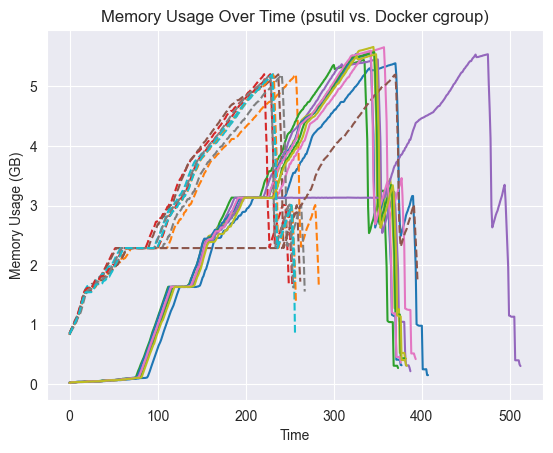

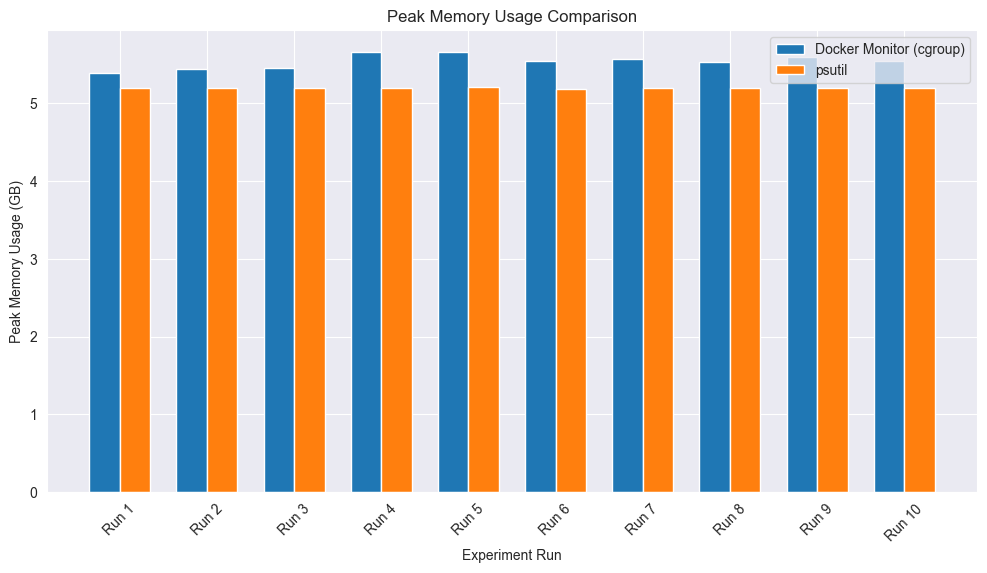

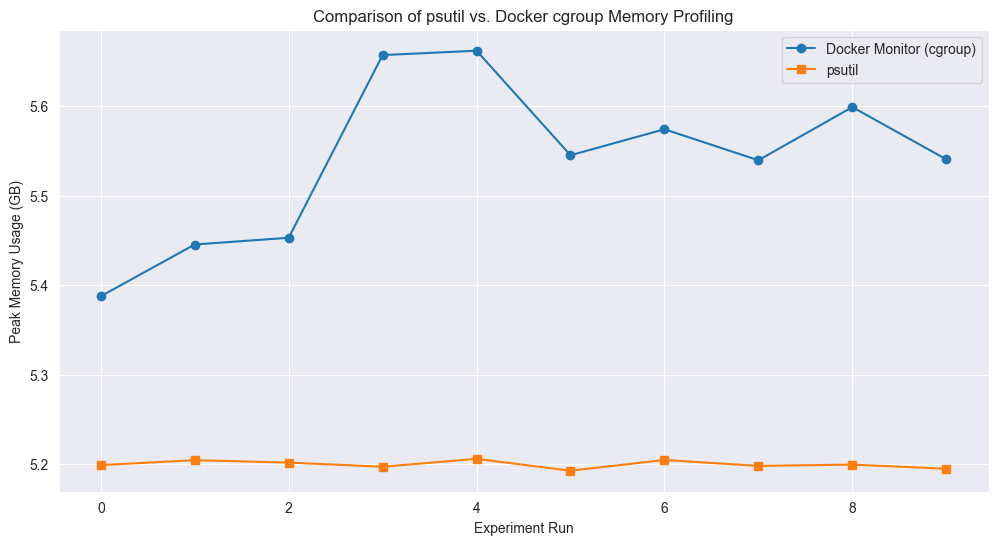

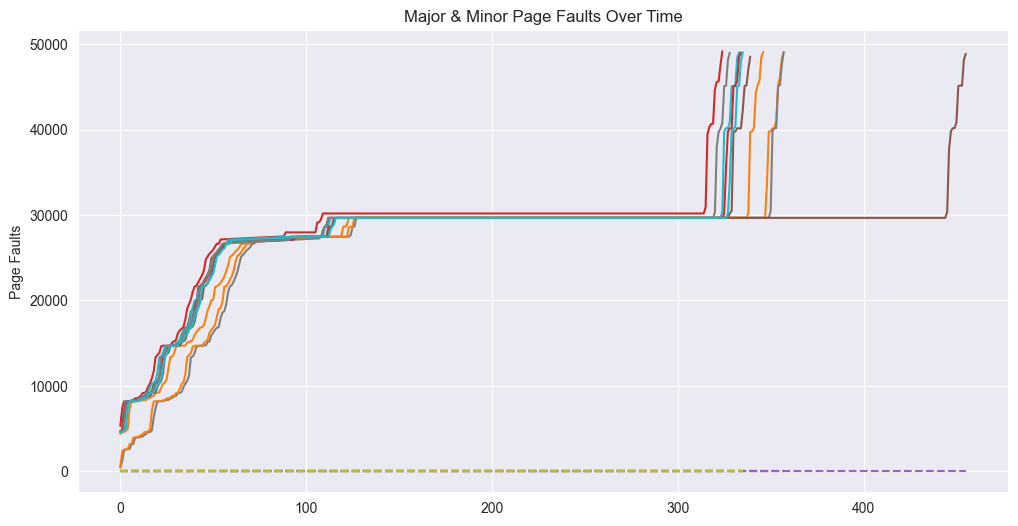

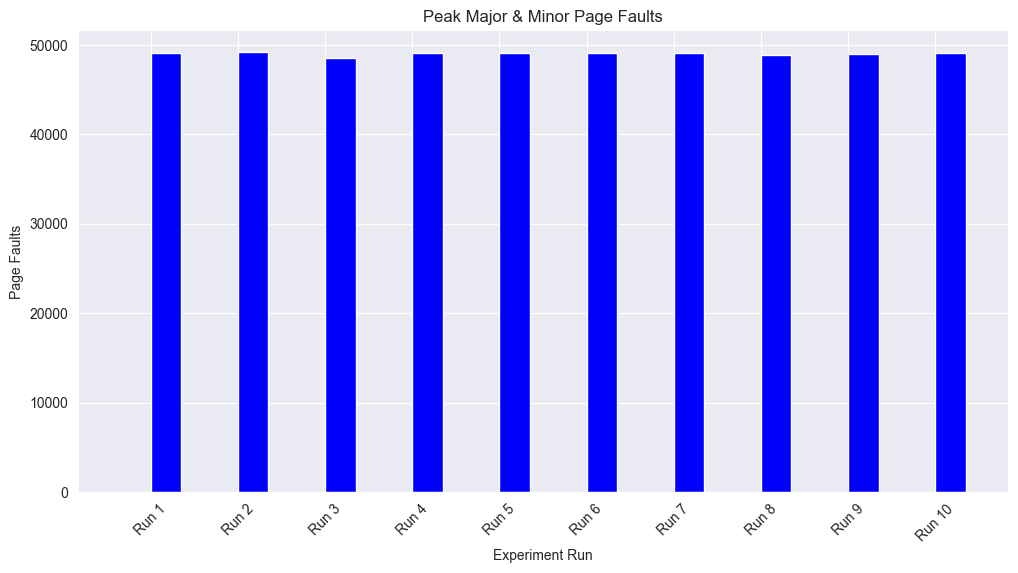

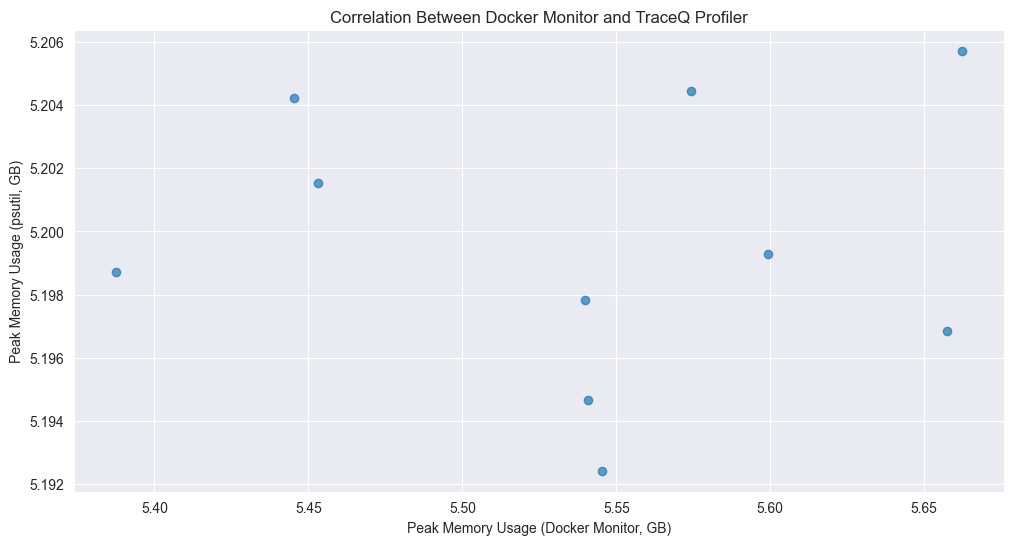

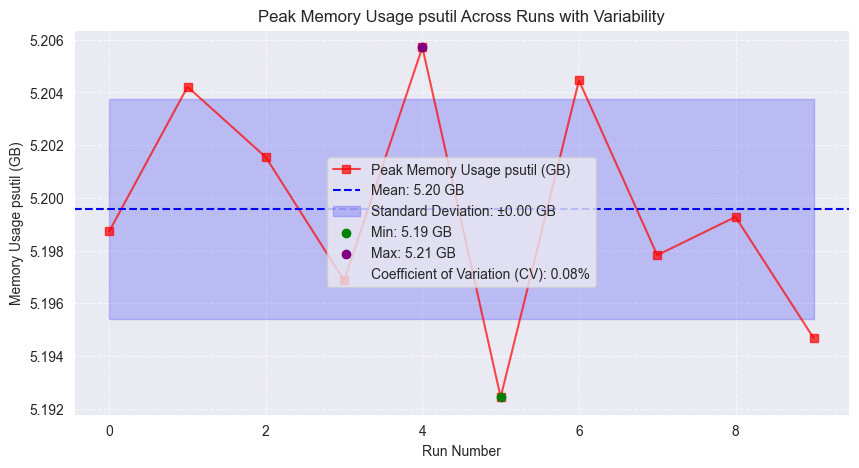

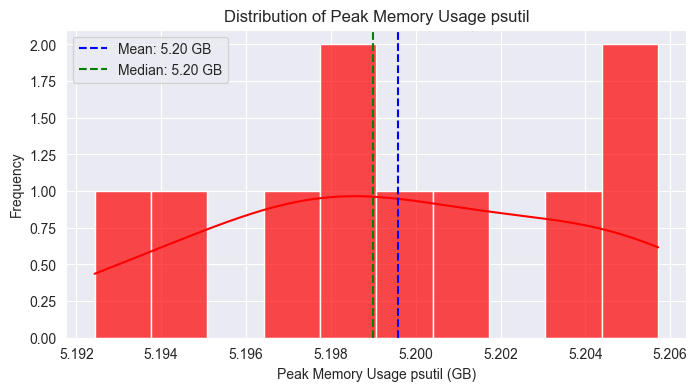

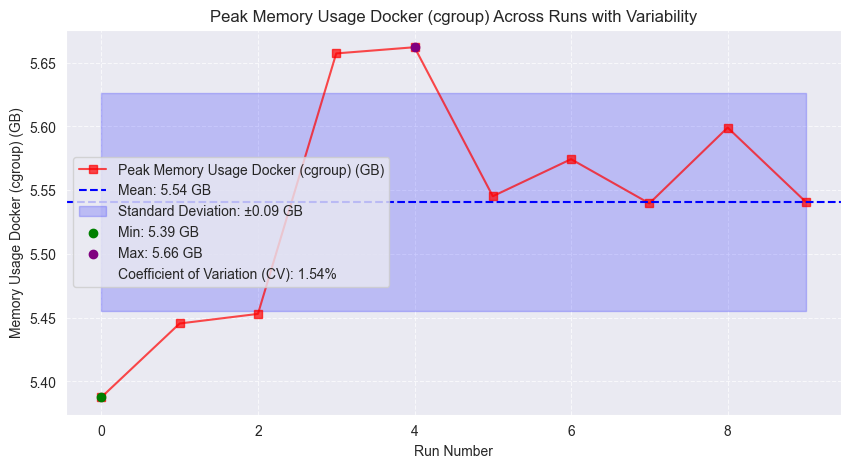

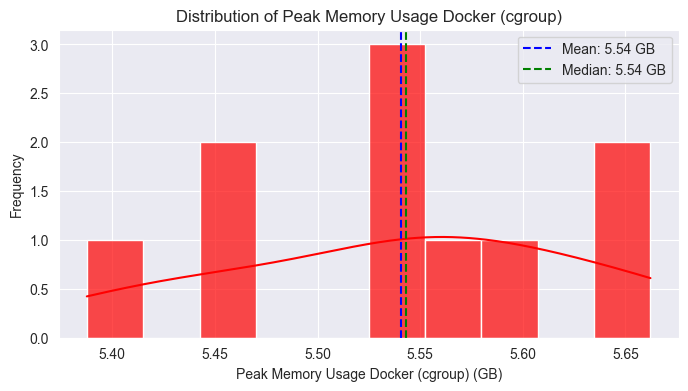

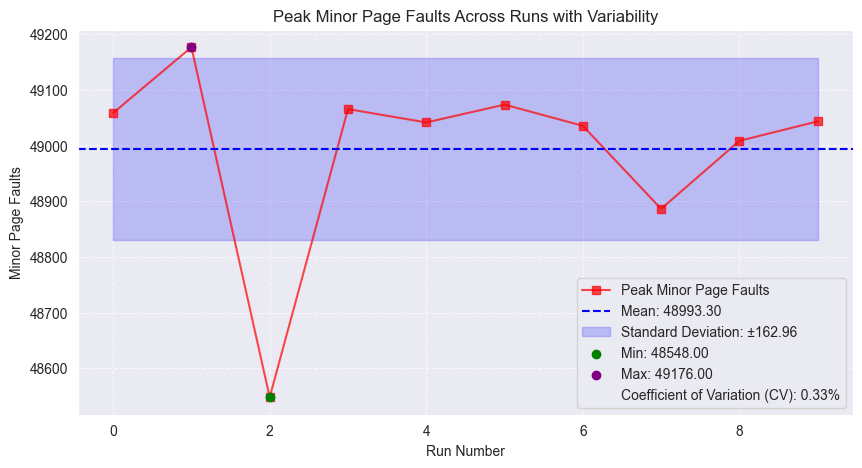

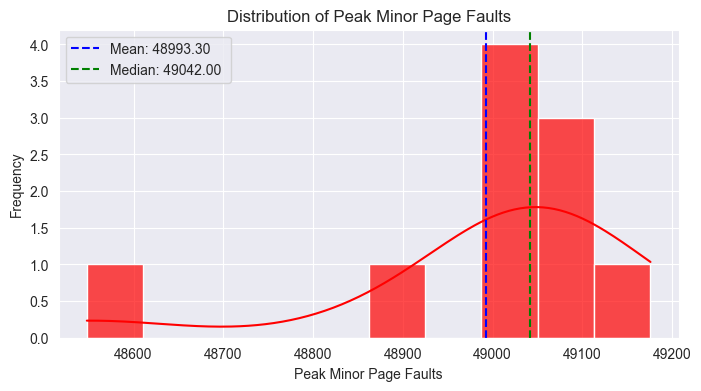

In [12]:
plot_experiment(psutil_experiment_history, "psutil")

Now, since we finished, let's cleanup the containers.

As we can see, the experiment is pretty stable.
We have small standard deviations, and small CVs, specially when it comes to the profiler itself.
Now, we'll run with another profiler, and check the results.

In [13]:
iterations = 10

resource_experiment_history = experiment(iterations, "resource")

2025-03-05 00:19:06.648 | INFO     | __main__:experiment:18 - Iteration 1/10
2025-03-05 00:19:07.066 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:19:07.455 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:19:07.457 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:19:15.603 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:19:15.604 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/03-memory-profiling-20250305001321/docker-monitor/memory-usage--experiment-resource-0.log
2025-03-05 00:19:15.613 | INFO     | tools.monitor:page_faults_log_to_df:32 - Reading page faults log file: ../out/03-memory-profiling-20250305001321/docker-monitor/page-faults-log-resource-0.log
2025-03-05 00:19:15.615 | INFO     | _

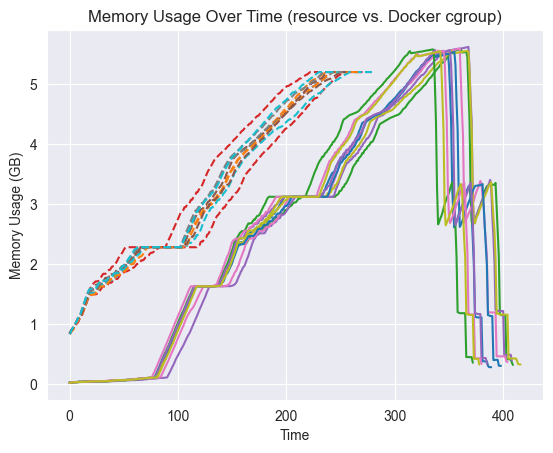

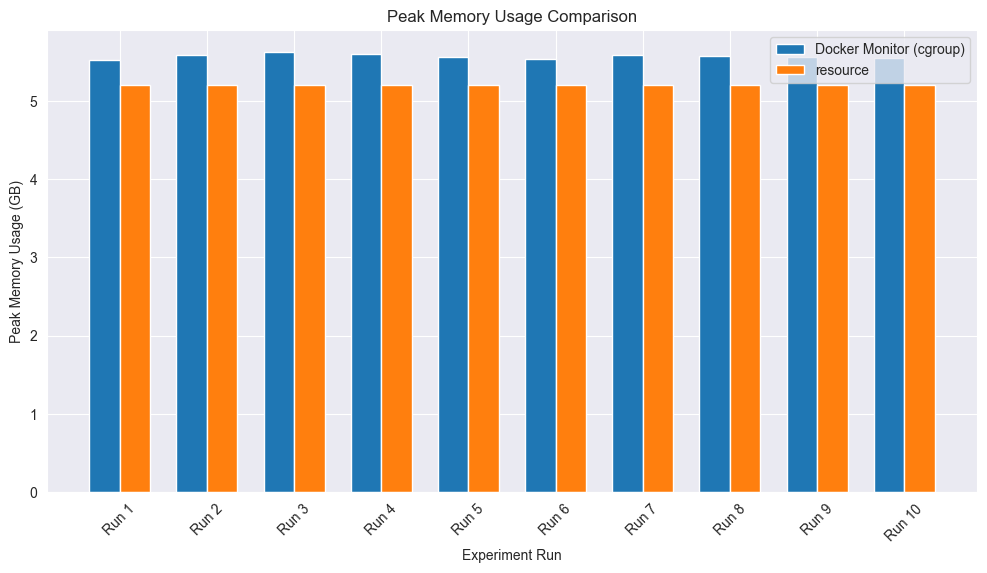

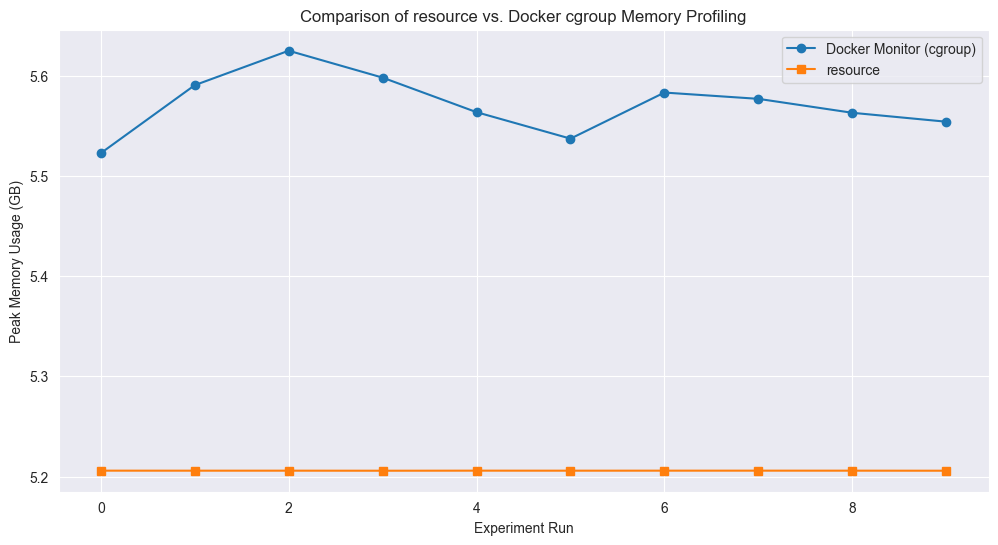

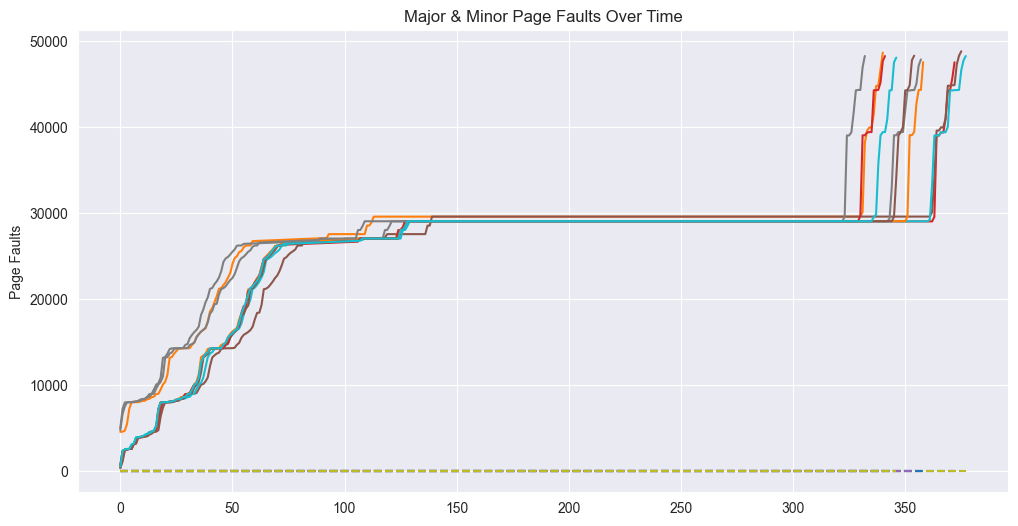

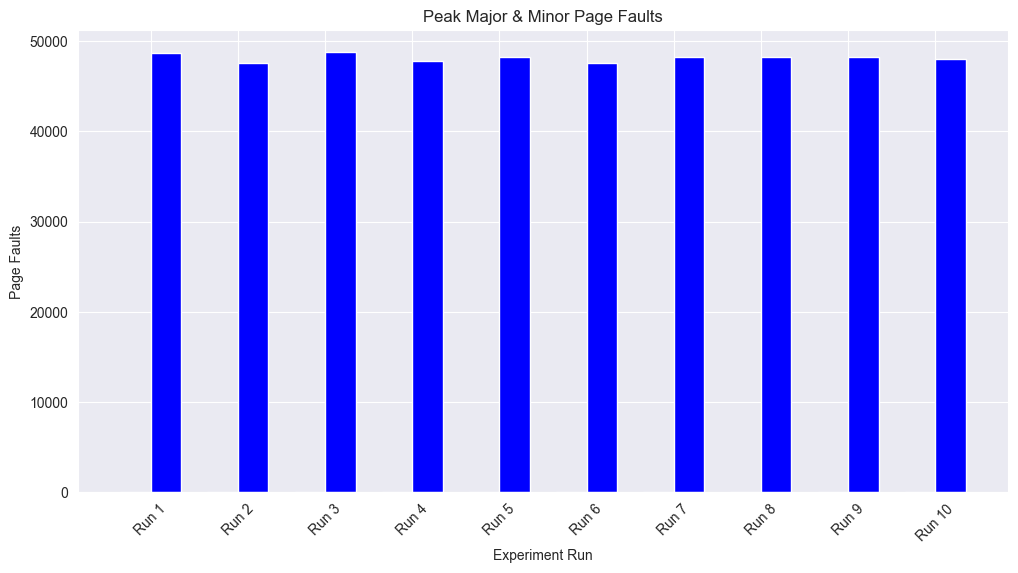

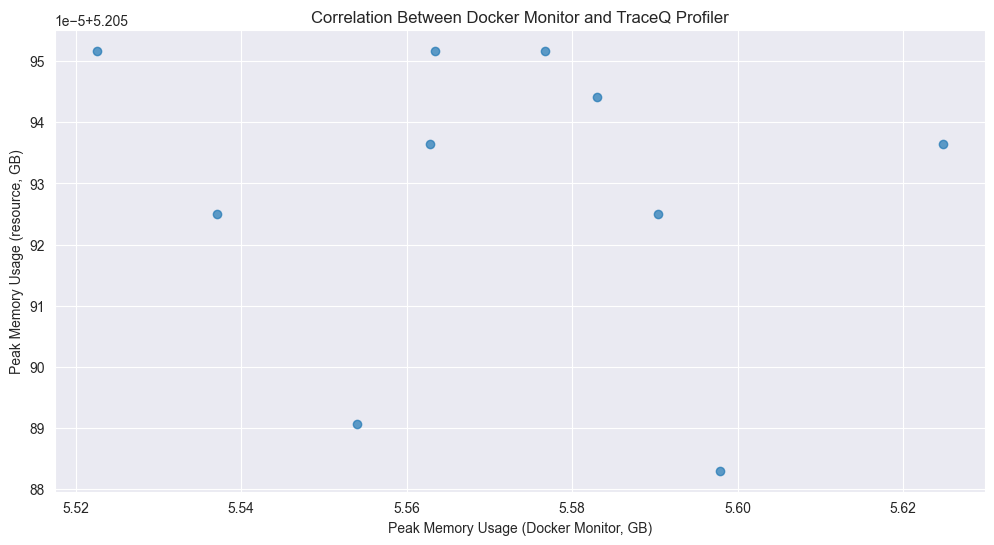

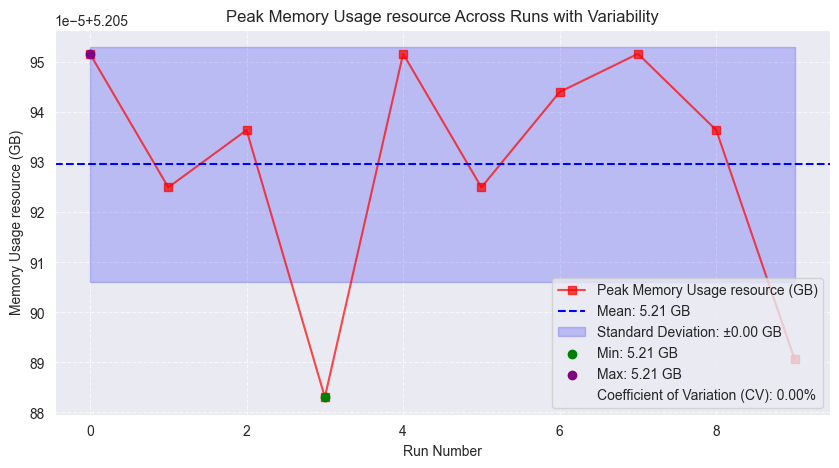

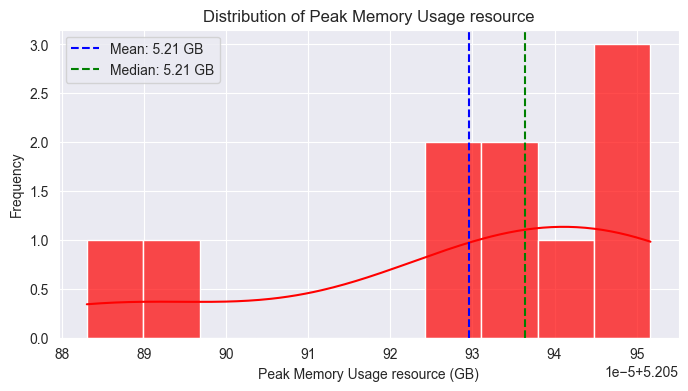

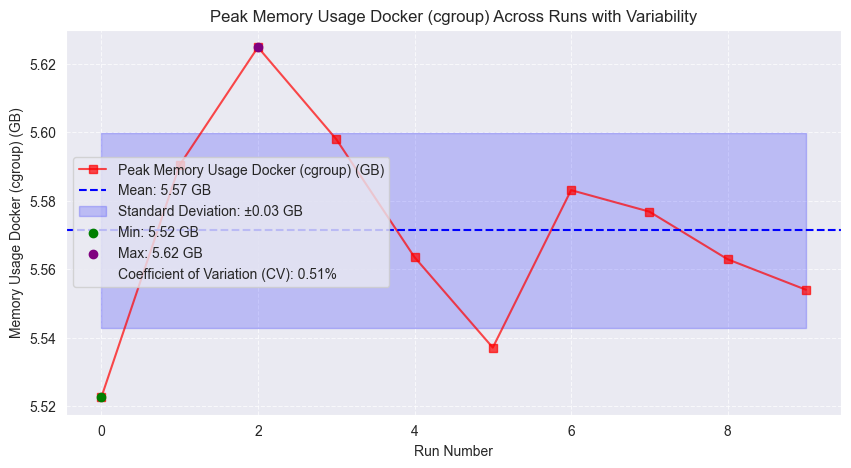

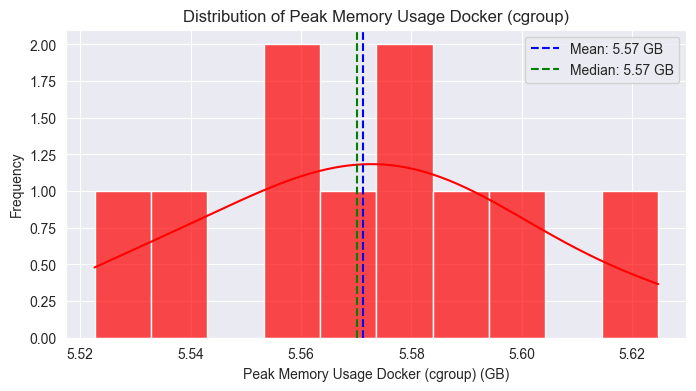

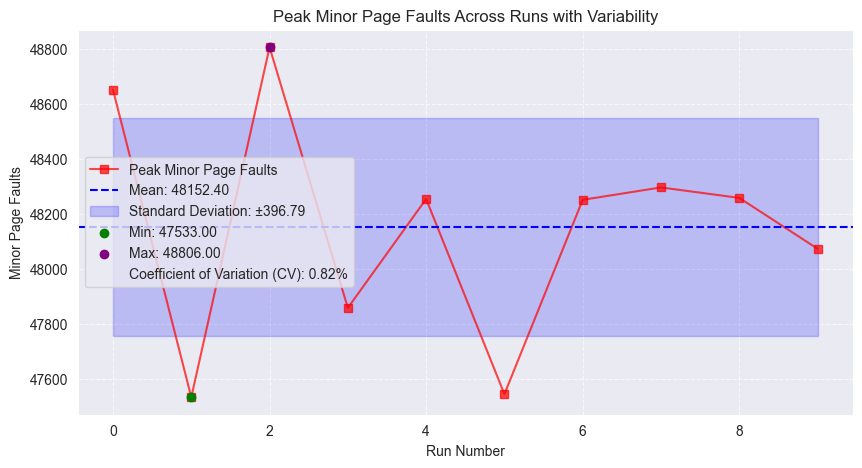

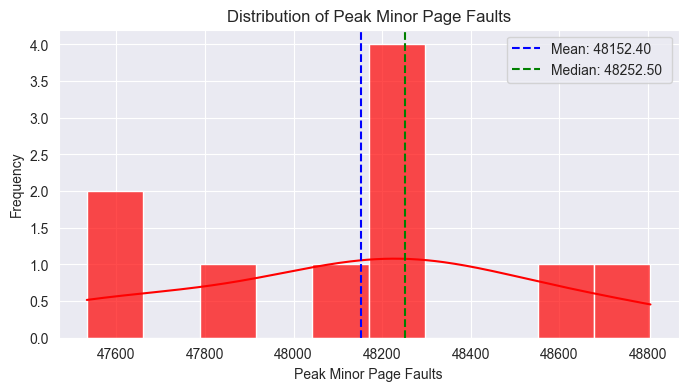

In [14]:
plot_experiment(resource_experiment_history, "resource")

Now, the final step is to compare both profiles.

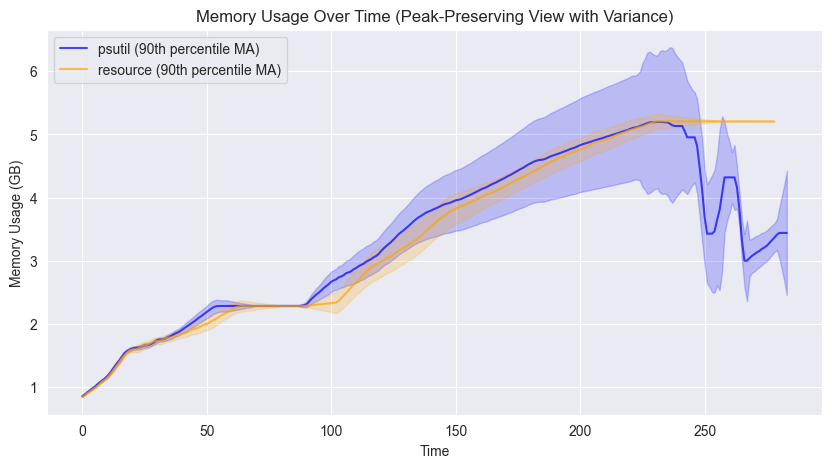

In [15]:
psutil_convert = mu_conversion_handlers_by_unit[
    psutil_experiment_history['traceq_history'][0]["metadata"]["psutil_memory_usage_unit"]]
resource_convert = mu_conversion_handlers_by_unit[
    resource_experiment_history['traceq_history'][0]["metadata"]["resource_memory_usage_unit"]]


def percentile_moving_average(data, percentile=90, window_size=5):
    return [
        np.percentile(data[max(0, i - window_size):i + 1], percentile)
        for i in range(len(data))
    ]


# Step 1: Determine the longest run (to standardize time steps)
max_psutil_time_steps = max(len(entry['data']) for entry in psutil_experiment_history['traceq_history'])
max_resource_time_steps = max(len(entry['data']) for entry in resource_experiment_history['traceq_history'])

# Step 2: Aggregate per time index across runs
psutil_time_aligned = [[] for _ in range(max_psutil_time_steps)]
resource_time_aligned = [[] for _ in range(max_resource_time_steps)]

for entry in psutil_experiment_history['traceq_history']:
    for i, value in enumerate(entry['data']):
        psutil_time_aligned[i].append(psutil_convert(value['psutil_memory_usage']))

for entry in resource_experiment_history['traceq_history']:
    for i, value in enumerate(entry['data']):
        resource_time_aligned[i].append(resource_convert(value["resource_memory_usage"]))

# Step 3: Compute the per-time-point aggregation (90th percentile & variance)
psutil_aggregated = [
    np.percentile(timestep_values, 90) if len(timestep_values) > 1 else np.nan
    for timestep_values in psutil_time_aligned
]
resource_aggregated = [
    np.percentile(timestep_values, 90) if len(timestep_values) > 1 else np.nan
    for timestep_values in resource_time_aligned
]

psutil_variance = [
    np.var(timestep_values) if len(timestep_values) > 1 else np.nan
    for timestep_values in psutil_time_aligned
]
resource_variance = [
    np.var(timestep_values) if len(timestep_values) > 1 else np.nan
    for timestep_values in resource_time_aligned
]

# Remove NaNs (only keep meaningful values)
psutil_valid_indices = ~np.isnan(psutil_aggregated)
resource_valid_indices = ~np.isnan(resource_aggregated)
psutil_aggregated = np.array(psutil_aggregated)[psutil_valid_indices]
resource_aggregated = np.array(resource_aggregated)[resource_valid_indices]
psutil_variance = np.array(psutil_variance)[psutil_valid_indices]
resource_variance = np.array(resource_variance)[resource_valid_indices]

# Step 4: Apply moving average
psutil_p90_ma = percentile_moving_average(psutil_aggregated, percentile=90)
resource_p90_ma = percentile_moving_average(resource_aggregated, percentile=90)

# Plot: Percentile Moving Average with Variance Shading
plt.figure(figsize=(10, 5))
plt.plot(psutil_p90_ma, label="psutil (90th percentile MA)", color='blue', alpha=0.7)
plt.plot(resource_p90_ma, label="resource (90th percentile MA)", color='orange', alpha=0.7)

# Adding variance shading (± standard deviation)
plt.fill_between(range(len(psutil_p90_ma)),
                 np.array(psutil_p90_ma) - np.sqrt(psutil_variance[:len(psutil_p90_ma)]),
                 np.array(psutil_p90_ma) + np.sqrt(psutil_variance[:len(psutil_p90_ma)]),
                 color='blue', alpha=0.2)

plt.fill_between(range(len(resource_p90_ma)),
                 np.array(resource_p90_ma) - np.sqrt(resource_variance[:len(resource_p90_ma)]),
                 np.array(resource_p90_ma) + np.sqrt(resource_variance[:len(resource_p90_ma)]),
                 color='orange', alpha=0.2)

plt.xlabel("Time")
plt.ylabel("Memory Usage (GB)")
plt.title("Memory Usage Over Time (Peak-Preserving View with Variance)")
plt.legend()
plt.grid(True)
plt.show()


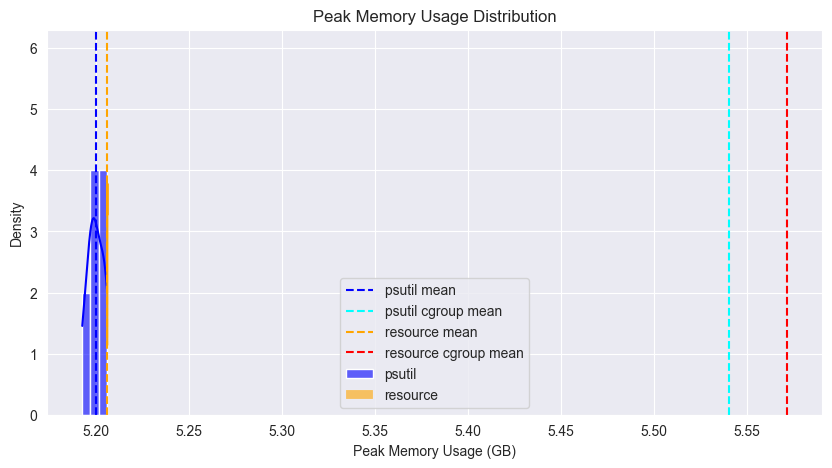

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(psutil_experiment_history['peak_traceq_mu_history'], kde=True, color='blue', label="psutil", alpha=0.6,
             bins=3)
sns.histplot(resource_experiment_history['peak_traceq_mu_history'], kde=True, color='orange', label="resource",
             alpha=0.6, bins=3)
plt.axvline(np.mean(psutil_experiment_history['peak_traceq_mu_history']), color='blue', linestyle='dashed',
            label="psutil mean")
plt.axvline(np.mean(psutil_experiment_history['peak_docker_monitor_mu_history']), color='cyan', linestyle='dashed',
            label="psutil cgroup mean")
plt.axvline(np.mean(resource_experiment_history['peak_traceq_mu_history']), color='orange', linestyle='dashed',
            label="resource mean")
plt.axvline(np.mean(resource_experiment_history['peak_docker_monitor_mu_history']), color='red', linestyle='dashed',
            label="resource cgroup mean")
plt.xlabel("Peak Memory Usage (GB)")
plt.ylabel("Density")
plt.title("Peak Memory Usage Distribution")
plt.legend()
plt.grid(True)
plt.show()

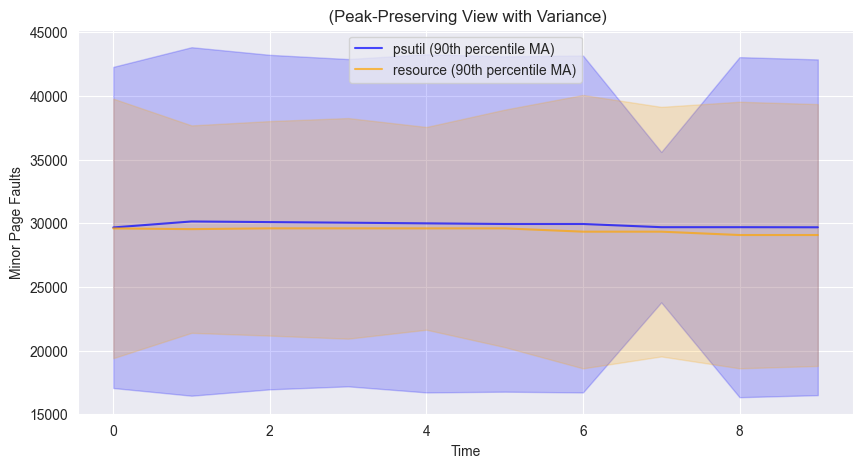

In [17]:
psutil_minor_pfs = [entry['minor_page_faults'].tolist() for entry in
                    psutil_experiment_history['docker_monitor_pf_history']]
resource_minor_pfs = [entry['minor_page_faults'].tolist() for entry in
                      resource_experiment_history['docker_monitor_pf_history']]

# Step 1: Determine the longest run (to standardize time steps)
max_psutil_time_steps = max([len(history) for history in psutil_minor_pfs])
max_resource_time_steps = max([len(history) for history in resource_minor_pfs])

# Step 2: Aggregate per time index across runs
psutil_time_aligned = [[0 for _ in range(max_psutil_time_steps)] for _ in psutil_minor_pfs]
resource_time_aligned = [[0 for _ in range(max_resource_time_steps)] for _ in resource_minor_pfs]

for i, entry in enumerate(psutil_minor_pfs):
    for f, value in enumerate(entry):
        psutil_time_aligned[i][f] = value

for i, entry in enumerate(resource_minor_pfs):
    for f, value in enumerate(entry):
        resource_time_aligned[i][f] = value

# Step 3: Compute the per-time-point aggregation (90th percentile & variance)
psutil_aggregated = [
    np.percentile(timestep_values, 90) if len(timestep_values) > 1 else np.nan
    for timestep_values in psutil_time_aligned
]
resource_aggregated = [
    np.percentile(timestep_values, 90) if len(timestep_values) > 1 else np.nan
    for timestep_values in resource_time_aligned
]

psutil_variance = [
    np.var(timestep_values) if len(timestep_values) > 1 else np.nan
    for timestep_values in psutil_time_aligned
]
resource_variance = [
    np.var(timestep_values) if len(timestep_values) > 1 else np.nan
    for timestep_values in resource_time_aligned
]

# Remove NaNs (only keep meaningful values)
valid_indices = ~np.isnan(psutil_aggregated) & ~np.isnan(resource_aggregated)
psutil_aggregated = np.array(psutil_aggregated)[valid_indices]
resource_aggregated = np.array(resource_aggregated)[valid_indices]
psutil_variance = np.array(psutil_variance)[valid_indices]
resource_variance = np.array(resource_variance)[valid_indices]

# Step 4: Apply moving average
psutil_p90_ma = percentile_moving_average(psutil_aggregated, percentile=90)
resource_p90_ma = percentile_moving_average(resource_aggregated, percentile=90)

# Plot: Percentile Moving Average with Variance Shading
plt.figure(figsize=(10, 5))
plt.plot(psutil_p90_ma, label="psutil (90th percentile MA)", color='blue', alpha=0.7)
plt.plot(resource_p90_ma, label="resource (90th percentile MA)", color='orange', alpha=0.7)

# Adding variance shading (± standard deviation)
plt.fill_between(range(len(psutil_p90_ma)),
                 np.array(psutil_p90_ma) - np.sqrt(psutil_variance[:len(psutil_p90_ma)]),
                 np.array(psutil_p90_ma) + np.sqrt(psutil_variance[:len(psutil_p90_ma)]),
                 color='blue', alpha=0.2)

plt.fill_between(range(len(resource_p90_ma)),
                 np.array(resource_p90_ma) - np.sqrt(resource_variance[:len(resource_p90_ma)]),
                 np.array(resource_p90_ma) + np.sqrt(resource_variance[:len(resource_p90_ma)]),
                 color='orange', alpha=0.2)

plt.xlabel("Time")
plt.ylabel("Minor Page Faults")
plt.title(" (Peak-Preserving View with Variance)")
plt.legend()
plt.grid(True)
plt.show()

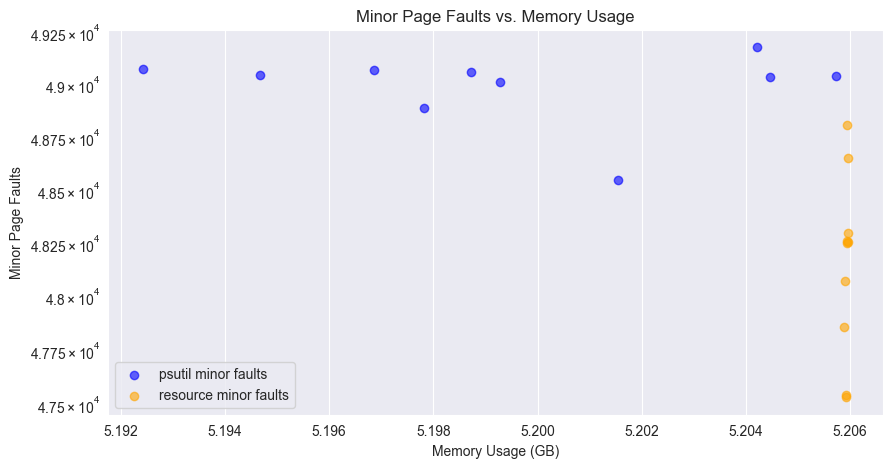

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(psutil_experiment_history['peak_traceq_mu_history'],
            psutil_experiment_history['peak_docker_monitor_minor_pf_history'], color='blue', alpha=0.6,
            label="psutil minor faults")
plt.scatter(resource_experiment_history['peak_traceq_mu_history'],
            resource_experiment_history['peak_docker_monitor_minor_pf_history'], color='orange', alpha=0.6,
            label="resource minor faults")
plt.xlabel("Memory Usage (GB)")
plt.ylabel("Minor Page Faults")
plt.yscale("log")
plt.title("Minor Page Faults vs. Memory Usage")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
vfs_container.stop()

## Summary of Findings

### Overview
During our analysis, we observed significant differences in behavior between the memory profilers (`psutil`, `resource`, and `cgroup`).
Each profiler reported memory usage differently, indicating that their methodologies and measurement techniques impact the results. Below are the key findings from our investigation.

### Differences in Memory Profiler Behavior
One of the most striking findings was the difference in reported memory usage between `psutil` and `resource`.
The `resource` profiler demonstrated remarkable stability, consistently reporting nearly identical memory usage values across runs, regardless of workload variations.
In contrast, `psutil` showed noticeable fluctuations, reflecting dynamic memory allocation and potential transient memory spikes.

#### `psutil`
- Captured transient memory fluctuations more accurately.
- Displayed notable variance across runs, indicating it reacts to temporary memory usage patterns.
- Showed a more **real-time process memory consumption**, including allocations and deallocations.

#### `resource`
- Reported **stable and consistent** memory usage across runs.
- Less responsive to transient allocations and deallocations, suggesting it might be capturing a more averaged-out or static snapshot.
- Likely includes only resident memory, ignoring temporary allocations.
- Captured only the peak memory usage so far (ignoring current memory usage on each point).

### Docker cgroup Memory Allocation
In our comparative analysis, we included Docker's cgroup-based memory tracking.
A key finding was that Docker consistently allocated **more memory** than the amount measured by both profilers (`psutil` and `resource`).
This discrepancy highlights a common challenge when monitoring memory usage within containerized environments:

- **cgroup Memory Usage > Reported Memory Usage**:
  - Docker reserves additional memory overhead beyond what the process actively uses.
  - This may be due to reserved buffers, memory fragmentation, or kernel-managed caches.
  - Ensuring adequate memory limits for containers requires considering this discrepancy.

### Technical Summary of Key Charts

#### Peak Memory Usage Distribution
- **Finding:** The peak memory usage reported by `resource` remained stable across runs, while `psutil` showed variability.
- **Insight:** Indicates that `resource` captures a **more static view of memory**, whereas `psutil` is more **sensitive to dynamic allocations**.

### Minor vs. Major Page Faults Over Time

- **Finding:** Page faults were measured using kernel `/proc` data, yet `resource` reported more page faults and higher variability than expected.
= **Insight:** This discrepancy suggests `resource` may be interpreting memory accesses differently, or it could be including additional system-level memory behaviors not captured by `psutil`.

### psutil vs. resource vs. cgroup Memory Usage Over Time
- **Finding:** cgroup consistently tracked higher memory usage than either profiler.
- **Insight:** Docker’s memory allocation strategy includes additional overhead.

### Correlating Page Faults with Memory Usage
- **Finding:** No clear correlation between page faults and memory usage was identified.
- **Insight:** This suggests that page faults are not necessarily driven by increased memory consumption, but could instead be influenced by other system-level behaviors, memory access patterns, or kernel memory management policies.

## Conclusion
- **Profiler Selection Matters:** Different memory profilers serve different purposes. `psutil` is more dynamic, while `resource` provides a stable baseline.
- **Docker Overhead Must Be Considered:** cgroup reports higher memory consumption than `psutil` or `resource`, likely due to container overhead.
- **Memory Tracking Strategy Depends on Use Case:** If detecting transient memory spikes is important, `psutil` is better. If aiming for a stable estimate, `resource` is preferable.

Further optimizations and profiling techniques can help refine memory tracking strategies, especially in containerized environments.

